In [1]:
#for better auto suggestion
%config IPCompleter.greedy=True


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#feature scaling
from sklearn.preprocessing import MinMaxScaler
#for tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
import os



In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\Dell\Downloads\datascience')

In [3]:
df = pd.read_csv('train_1.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
catagorical=[var for var in df.columns if df[var].dtype=='O']
print('no. of variable in catagorical is',len(catagorical))


no. of variable in catagorical is 5


In [7]:
numerical=[var for var in df.columns if df[var].dtype!='O']

print('no. of variable in numerical is',len(numerical))


no. of variable in numerical is 7


In [8]:
#discere values

discrete=[]
for var in numerical:
    if len(df[var].unique())<20 and var not in ['Survived','PassengerId'] :
        print(var,df[var].unique())
        discrete.append(var)

    


Pclass [3 1 2]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]


In [9]:
discrete

['Pclass', 'SibSp', 'Parch']

In [10]:
#find out null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
continous=[var for var in numerical if var not in ['PassengerId','Survived'] and var not in discrete]

In [12]:
continous

['Age', 'Fare']

Text(0, 0.5, 'Fare')

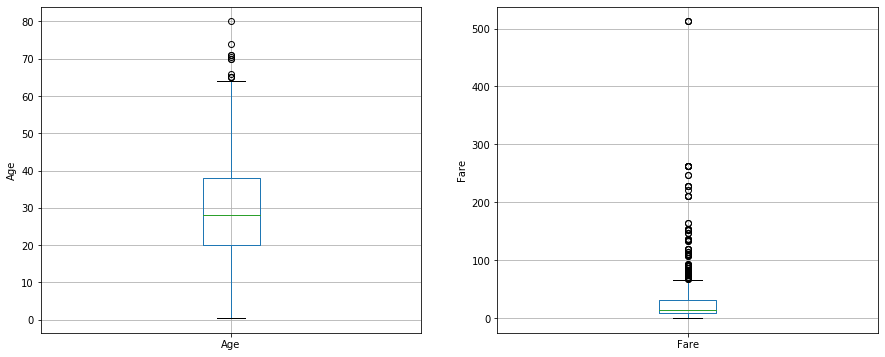

In [13]:
#outliers for continous varible
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = df.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')


Text(0.5, 0, 'Fare')

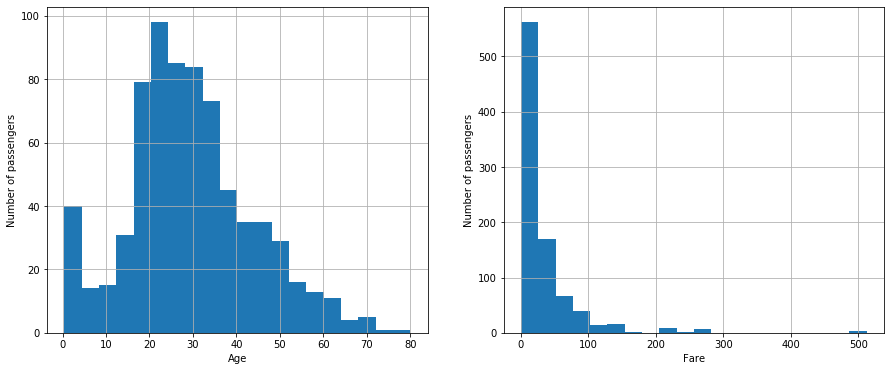

In [14]:
#plot to see skewness
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df['Age'].hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = df.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [15]:
#Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare

# find outliers

# Age
Upper_boundary = df.Age.mean() + 3* df.Age.std()
Lower_boundary = df.Age.mean() - 3* df.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
Lower_fence = df.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = df.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -13.88037434994331 or > 73.27860964406095
Fare outliers are values < -61.358399999999996 or > 100.2688


Age outliers are values < -13.88037434994331 or > 73.27860964406095
Fare outliers are values < -61.358399999999996 or > 100.2688
We should remove from the dataset Ages > 73 or Fares > 100.

There are a few methods to handle outliers, one is top-coding, the other one is discretisation of variables. I will use top-coding for Age, and discretisation for Fare.


In [16]:
#find outliers for discrete variable
for var in discrete:
    print(df[var].value_counts()/np.float(len(df)))


3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


Pclass does not contain outliers, as all its numbers are present in at least 20% of the passengers.

SibSp This variable indicates the number of of siblings / spouses aboard the Titanic. Values bigger than 4, are rare. So I will cap this variable at 4 (top coding).

Parch This variable indicates the number of parents / children aboard the Titanic. We can see that values > 2 are rare (present in less than 1% of passengers). Thus I will cap this variable at 2 (top-coding).

In [17]:
#Number of labels: cardinality¶
for var in catagorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')


Name  contains  891  labels
Sex  contains  2  labels
Ticket  contains  681  labels
Cabin  contains  148  labels
Embarked  contains  4  labels


In [18]:
#pre-procesing of mixed type variable
df['Cabin_numerical'] = df.Cabin.str.extract('(\d+)') # extracts number from string
df['Cabin_numerical'] = df['Cabin_numerical'].astype('float') # parses the above variable to float type

df['Cabin_categorical'] = df['Cabin'].str[0] # captures first letter of string (the letter of the cabin)
df[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()


,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85.0,C
2,NaN,NaN,NaN
3,C123,123.0,C
4,NaN,NaN,NaN


In [19]:
# drop the original variable
df.drop(labels='Cabin', inplace=True, axis=1)

In [20]:
#  Ticket
# extract the last bit of ticket as number
df['Ticket_numerical'] = df.Ticket.apply(lambda s: s.split()[-1])
df['Ticket_numerical'] = np.where(df.Ticket_numerical.str.isdigit(), df.Ticket_numerical, np.nan)
df['Ticket_numerical'] = df['Ticket_numerical'].astype('float')

# extract the first part of ticket as category
df['Ticket_categorical'] = df.Ticket.apply(lambda s: s.split()[0])
df['Ticket_categorical'] = np.where(df.Ticket_categorical.str.isdigit(), np.nan, df.Ticket_categorical)


# extract the first part of ticket as category
df[['Ticket', 'Ticket_numerical', 'Ticket_categorical']].head()

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171.0,A/5
1,PC 17599,17599.0,PC
2,STON/O2. 3101282,3101282.0,STON/O2.
3,113803,113803.0,NaN
4,373450,373450.0,NaN


In [21]:
# let's explore the ticket categorical part a bit further
df.Ticket_categorical.unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [22]:
# it contains several labels, some of them seem very similar apart from the punctuation
# I will try to reduce this number of labels a bit further

# remove non letter characters from string
text = df.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))

# to visualise the output and compare with input
pd.concat([text, df.Ticket_categorical], axis=1)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
5,nan,NaN
6,nan,NaN
7,nan,NaN
8,nan,NaN
9,nan,NaN


In [23]:
# set to upper case: we reduce the number of labels quite a bit
text = text.str.upper()
text.unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

In [24]:
df['Ticket_categorical'] = text

In [25]:
df['Ticket_categorical'].unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

In [26]:

# drop the original variable
df.drop(labels='Ticket', inplace=True, axis=1)

In [27]:

def get_title(passenger):
    # extracts the title from the name variable
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
df['Title'] = df['Name'].apply(get_title)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [28]:

# drop the original variable
df.drop(labels='Name', inplace=True, axis=1)

1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: Family_size, dtype: float64


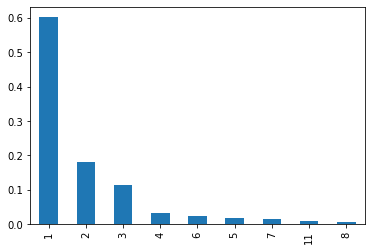

In [29]:
# create a variable indicating family size (including the passenger)
# sums siblings and parents

df['Family_size'] = df['SibSp']+df['Parch']+1
print(df.Family_size.value_counts()/ np.float(len(df)))

(df.Family_size.value_counts() / np.float(len(df))).plot.bar()

In [32]:
#The new variable Family size is discrete, because it is the sum of 2 discrete variables. It takes a finite number of values, and large families were rare on the Titanic. In fact, families larger than 7 people were rare, so I will cap family size at 7.

In [33]:
# variable indicating if passenger was a mother
df['is_mother'] = np.where((df.Sex =='female')&(df.Parch>=1)&(df.Age>18),1,0)
df[['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
0,male,0,22.0,0
1,female,0,38.0,0
2,female,0,26.0,0
3,female,0,35.0,0
4,male,0,35.0,0


In [34]:
df.loc[df.is_mother==1, ['Sex', 'Parch', 'Age', 'is_mother']].head()


,Sex,Parch,Age,is_mother
8,female,2,27.0,1
25,female,5,38.0,1
88,female,2,23.0,1
98,female,1,34.0,1
136,female,2,19.0,1


In [35]:
print('there were {} mothers in the Titanic'.format(df.is_mother.sum()))


there were 64 mothers in the Titanic


In [36]:
#Let's look for missing data, outliers, cardinality and rare labels in the newly created variables.

df[['Cabin_numerical', 'Ticket_numerical', 'is_mother', 'Family_size']].isnull().mean()


Cabin_numerical     0.775533
Ticket_numerical    0.004489
is_mother           0.000000
Family_size         0.000000
dtype: float64


Cabin_numerical, as expected contains the same amount of missing data than the original variable Cabin.

Ticket, also contains a small percentage of missing values. The other newly created variables do not contain missing data, as expected.

Text(0.5, 0, 'Ticket number')

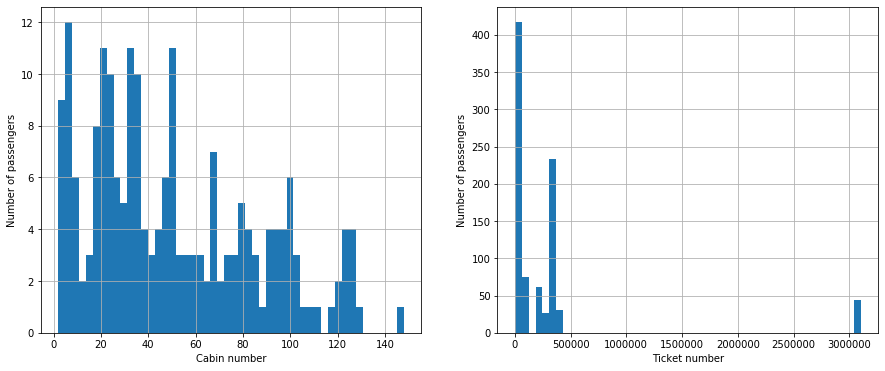

In [37]:
#New numerical variables: Outliers¶
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.Cabin_numerical.hist(bins=50)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Cabin number')

plt.subplot(1, 2, 2)
fig = df.Ticket_numerical.hist(bins=50)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Ticket number')



Text(0, 0.5, 'Ticket number')

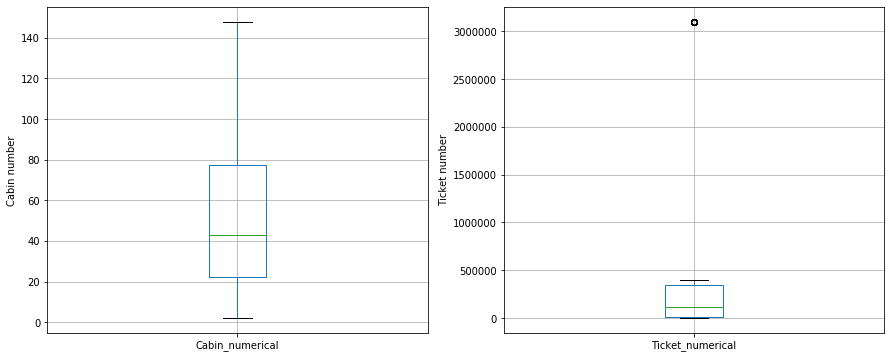

In [38]:
# let's visualise outliers with the boxplot and whiskers
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.boxplot(column='Cabin_numerical')
fig.set_title('')
fig.set_ylabel('Cabin number')

plt.subplot(1, 2, 2)
fig = df.boxplot(column='Ticket_numerical')
fig.set_title('')
fig.set_ylabel('Ticket number')

In [39]:
# Ticket numerical

IQR = df.Ticket_numerical.quantile(0.75) - df.Ticket_numerical.quantile(
    0.25)
Lower_fence = df.Ticket_numerical.quantile(0.25) - (IQR * 3)
Upper_fence = df.Ticket_numerical.quantile(0.75) + (IQR * 3)
print(
    'Ticket number outliers are values < {lowerboundary} or > {upperboundary}'.
    format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
passengers = len(df[df.Ticket_numerical > Upper_fence]) / np.float(
    len(df))
print('Number of passengers with ticket values higher than {upperboundary}: {passengers}'.format(upperboundary=Upper_fence, \
                                                                                                 passengers=passengers))

Ticket number outliers are values < -981730.0 or > 1343691.0
Number of passengers with ticket values higher than 1343691.0: 0.04938271604938271



I will use equal width discretisation for this variable.

In [40]:
#New categorical variables: Missing values¶
df[['Cabin_categorical', 'Ticket_categorical', 'Title']].isnull().mean()


Cabin_categorical     0.771044
Ticket_categorical    0.000000
Title                 0.000000
dtype: float64


As expected, Cabin contains the same amount of missing data as the original Cabin variable.

The other 2 variables do not show missing data.

In [41]:
#New categorical variables: cardinality¶

for var in ['Cabin_categorical', 'Ticket_categorical', 'Title']:
    print(var, ' contains ', len(df[var].unique()), ' labels')


Cabin_categorical  contains  9  labels
Ticket_categorical  contains  28  labels
Title  contains  5  labels


Title and Cabin are not highly cardinal, Ticket on the other hand has quite a few labels. Let's explore the percentage of passengers within each label to identify rare labels.

In [42]:
#New categorical variables: rare labels¶
# rare / infrequent labels (less than 1% of passengers)
for var in ['Cabin_categorical', 'Ticket_categorical', 'Title']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_categorical, dtype: float64

NAN        0.741863
PC         0.067340
CA         0.046016
A          0.031425
STONO      0.020202
SOTONOQ    0.016835
SCPARIS    0.012346
WC         0.011223
SOC        0.006734
FCC        0.005612
C          0.005612
LINE       0.004489
SOPP       0.003367
SCAH       0.003367
PP         0.003367
WEP        0.003367
SOTONO     0.002245
SWPP       0.002245
PPP        0.002245
SCA        0.001122
AS         0.001122
CASOTON    0.001122
SP         0.001122
SOP        0.001122
FC         0.001122
SCOW       0.001122
SC         0.001122
FA         0.001122
Name: Ticket_categorical, dtype: float64

Mr        0.581369
Miss      0.202020
Mrs       0.144781
Master    0.044893
Other     0.026936
Name: Title, dtype: float64



In [43]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(df, df.Survived, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((712, 16), (179, 16))

In [44]:
# let's group again the variables into categorical or numerical
# now considering the newly created variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']
numerical= [col for col in df.columns if df[col].dtypes != 'O']
                 


In [45]:
categorical

['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

In [46]:
numerical = [var for var in numerical if var not in ['Survived','PassengerId']]
numerical

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin_numerical',
 'Ticket_numerical',
 'Family_size',
 'is_mother']

In [47]:

#Engineering missing values in numerical variables 

In [48]:
# print variables with missing data
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Age 0.19803370786516855
Cabin_numerical 0.776685393258427
Ticket_numerical 0.0056179775280898875


Age and ticket contains < 50% NA: create additional variable with NA + random sample imputation

Cabin_numerical contains > 50% NA: impute NA by value far in the distribution

In [49]:
def impute_na(X_train, df, variable):
    # make temporary df copy
    temp = df.copy()
    
    # extract random from train set to fill the na
    random_sample = X_train[variable].dropna().sample(temp[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = temp[temp[variable].isnull()].index
    temp.loc[temp[variable].isnull(), variable] = random_sample
    return temp[variable]

In [50]:
# Age and ticket
# add variable indicating missingness
for df in [X_train, X_test]:
    for var in ['Age', 'Ticket_numerical']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
    
# replace by random sampling
for df in [X_train, X_test]:
    for var in ['Age', 'Ticket_numerical']:
        df[var] = impute_na(X_train, df, var)
    

# Cabin numerical
extreme = X_train.Cabin_numerical.mean() + X_train.Cabin_numerical.std()*3
for df in [X_train, X_test]:
    df.Cabin_numerical.fillna(extreme, inplace=True)

In [51]:
#Engineering Missing Data in categorical variables 
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Embarked 0.0028089887640449437
Cabin_categorical 0.7710674157303371


Embarked NA imputed by most frequent category, because NA is low

Cabin_categorical imputed by 'Missing', because NA is high

In [52]:
# add label indicating 'Missing' to Cabin categorical
# or replace by most frequent label in Embarked

for df in [X_train, X_test]:
    df['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
    df['Cabin_categorical'].fillna('Missing', inplace=True)
    df['Ticket_categorical'].fillna('missing',inplace=True)

In [53]:
# check absence of null values
X_train.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

In [54]:
X_test.isnull().sum()


PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

#Outliers in Numerical variables
______________________________________________________________

Age: top-coding (73)

Fare: equal frequency binning

Sibsp: top-coding (4)

Parch: top-coding (2)

Family Size: top-coding (7)

Ticket_number: equal frequency binning

In [55]:
def top_coding (df,var,top):
   return np.where(df[var]>top,top,df[var])

In [56]:
for df in [X_train,X_test]:
    df['Age'] = top_coding(df, 'Age', 73)
    df['SibSp'] = top_coding(df, 'SibSp', 4)
    df['Parch'] = top_coding(df, 'Parch', 2)
    df['Family_size'] = top_coding(df, 'Family_size', 7)

In [57]:
# let's check that it worked
for var in ['Age',  'SibSp', 'Parch', 'Family_size']:
    print(var, ' max value: ', X_train[var].max())

Age  max value:  73.0
SibSp  max value:  4
Parch  max value:  2
Family_size  max value:  7


In [58]:
# find quantiles and discretise train set
X_train['Ticket_numerical'], bins = pd.qcut(x=X_train['Ticket_numerical'], q=8, retbins=True, precision=3, duplicates='raise')
X_test['Ticket_numerical'] = pd.cut(x = X_test['Ticket_numerical'], bins=bins, include_lowest=True)

In [59]:
X_test.Ticket_numerical.isnull().sum()

0

In [60]:
# inspect the ticket bins in training set
X_train.Ticket_numerical.unique()

[(2.999, 2816.875], (14737.5, 24421.875], (364848.0, 3101317.0], (24421.875, 113053.0], (248701.0, 347077.25], (113053.0, 248701.0], (2816.875, 14737.5], (347077.25, 364848.0]]
Categories (8, interval[float64]): [(2.999, 2816.875] < (2816.875, 14737.5] < (14737.5, 24421.875] < (24421.875, 113053.0] < (113053.0, 248701.0] < (248701.0, 347077.25] < (347077.25, 364848.0] < (364848.0, 3101317.0]]

In [61]:

# find quantiles and discretise train set
X_train['Fare'], bins = pd.qcut(x=X_train['Fare'], q=8, retbins=True, precision=3, duplicates='raise')
X_test['Fare'] = pd.cut(x = X_test['Fare'], bins=bins, include_lowest=True)

In [62]:
X_train.Ticket_categorical = X_train.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))
X_test.Ticket_categorical = X_test.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))

In [63]:

#Engineering rare labels in categorical variables 
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

Sex male      0.65309
female    0.34691
Name: Sex, dtype: float64

Embarked S    0.728933
C    0.181180
Q    0.089888
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.771067
C          0.061798
B          0.050562
E          0.040730
D          0.036517
A          0.021067
F          0.012640
G          0.004213
T          0.001404
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.728933
PC         0.066011
CA         0.050562
A          0.035112
STONO      0.023876
SOTONOQ    0.016854
SCPARIS    0.014045
WC         0.014045
SOC        0.007022
C          0.005618
LINE       0.005618
WEP        0.004213
PP         0.004213
PPP        0.002809
SOTONO     0.002809
SOPP       0.002809
FCC        0.002809
SCAH       0.002809
SP         0.001404
FC         0.001404
AS         0.001404
FA         0.001404
SCA        0.001404
SCOW       0.001404
SWPP       0.001404
Name: Ticket_categorical, dtype: float64

Title Mr        0.589888
Miss      0.200843
Mrs   


Cabin contains the rare labels G and T: replace by most frequent category

Ticket contains a lot of infrequent labels: replace by rare
Because the number of passengers in the rare cabins is so small, grouping them into a new category called rare, will be in itself rare, and may be prone to over-fitting.
Thus, in cabin, I will replace rare labels by the most frequent category. In ticket_categorical, on the other hand, the number of infrequent labels is high, therefore grouping them into a new label makes sense.

In [64]:
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which=='frequent':
        # find the most frequent category
        mode_label = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], mode_label)
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], mode_label)
    
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')


In [65]:
rare_imputation('Cabin_categorical', 'frequent')
rare_imputation('Ticket_categorical', 'rare')

In [66]:
# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

Sex male      0.65309
female    0.34691
Name: Sex, dtype: float64

Embarked S    0.728933
C    0.181180
Q    0.089888
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.776685
C          0.061798
B          0.050562
E          0.040730
D          0.036517
A          0.021067
F          0.012640
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.728933
PC         0.066011
Rare       0.050562
CA         0.050562
A          0.035112
STONO      0.023876
SOTONOQ    0.016854
SCPARIS    0.014045
WC         0.014045
Name: Ticket_categorical, dtype: float64

Title Mr        0.589888
Miss      0.200843
Mrs       0.140449
Master    0.049157
Other     0.019663
Name: Title, dtype: float64



In [67]:
#Encode categorical variables
categorical


['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

Sex: one hot encoding
Remaining variables: replace by risk probability

In [68]:
for df in [X_train, X_test]:
    df['Sex']  = pd.get_dummies(df.Sex, drop_first=True)

In [69]:
df.Sex.unique()

array([1, 0], dtype=uint64)

In [70]:
for var in categorical:
    print(var,df[var].unique())

Sex [1 0]
Embarked ['C' 'S' 'Q']
Cabin_categorical ['Missing' 'B' 'C' 'E' 'D' 'F']
Ticket_categorical ['NAN' 'Rare' 'PC' 'CA' 'SCPARIS' 'SOTONOQ' 'STONO' 'A']
Title ['Mr' 'Master' 'Mrs' 'Miss' 'Other']


In [71]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)

# enccode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'Survived')

In [72]:
for var in categorical:
    print(var,df[var].unique())

Sex [0.19139785 0.74493927]
Embarked [0.52713178 0.34296724 0.421875  ]
Cabin_categorical [0.3074141  0.72222222 0.54545455 0.75862069 0.69230769 0.66666667]
Ticket_categorical [0.39499037 0.30555556 0.61702128 0.5        0.16666667 0.41176471
 0.08      ]
Title [0.15714286 0.57142857 0.79       0.70629371 0.5       ]


In [73]:
df.Fare.dtypes

CategoricalDtype(categories=[(-0.001, 7.75], (7.75, 7.918], (7.918, 10.353], (10.353, 14.456], (14.456, 24.15], (24.15, 31.275], (31.275, 66.6], (66.6, 512.329]],
              ordered=True)

In [74]:
# parse discretised variables(the numerical varibles which we convrted before) to object before encoding
for df in [X_train, X_test]:
    df.Fare = df.Fare.astype('O')
    df.Ticket_numerical = df.Ticket_numerical.astype('O')

In [75]:
df.Fare.dtypes

dtype('O')

In [76]:

# encode numerical labels
for var in ['Fare', 'Ticket_numerical']:
    print(var)
    encode_categorical_variables(var, 'Survived')

Fare
Ticket_numerical


In [77]:

#let's inspect the dataset
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
140,141,0,3,0.744939,27.0,0,2,0.397849,0.527132,158.222059,0.307414,0.348315,0.394990,0.790000,3,0,1,0
439,440,0,2,0.191398,31.0,0,0,0.404494,0.342967,158.222059,0.307414,0.573034,0.305556,0.157143,1,0,0,0
817,818,0,2,0.191398,31.0,1,1,0.494118,0.527132,158.222059,0.307414,0.348315,0.500000,0.157143,3,0,0,0
378,379,0,3,0.191398,20.0,0,0,0.223214,0.527132,158.222059,0.307414,0.348315,0.394990,0.157143,1,0,0,0
491,492,0,3,0.191398,21.0,0,0,0.223214,0.342967,158.222059,0.307414,0.306818,0.166667,0.157143,1,0,0,0


We can see that the labels how now been replaced by the survival probability.



In [78]:
#Feature scaling

X_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,443.283708,0.383427,2.317416,0.383427,29.807584,0.484551,0.353933,0.383427,0.383427,133.956178,0.383427,0.383427,0.383427,0.383427,1.875000,0.067416,0.198034,0.005618
std,260.003783,0.486563,0.833767,0.263664,14.496489,0.907718,0.673811,0.144616,0.071238,48.398112,0.149408,0.118238,0.098434,0.276532,1.460148,0.250917,0.398798,0.074795
min,1.000000,0.000000,1.000000,0.191398,0.670000,0.000000,0.000000,0.212121,0.342967,2.000000,0.307414,0.166667,0.080000,0.157143,1.000000,0.000000,0.000000,0.000000
25%,211.750000,0.000000,2.000000,0.191398,21.000000,0.000000,0.000000,0.232770,0.342967,158.222059,0.307414,0.321087,0.394990,0.157143,1.000000,0.000000,0.000000,0.000000
50%,441.000000,0.000000,3.000000,0.191398,28.750000,0.000000,0.000000,0.397849,0.342967,158.222059,0.307414,0.370787,0.394990,0.157143,1.000000,0.000000,0.000000,0.000000
75%,671.250000,1.000000,3.000000,0.744939,38.000000,1.000000,0.000000,0.444444,0.421875,158.222059,0.307414,0.474719,0.394990,0.706294,2.000000,0.000000,0.000000,0.000000
max,890.000000,1.000000,3.000000,0.744939,73.000000,4.000000,2.000000,0.659091,0.527132,158.222059,0.758621,0.573034,0.617021,0.790000,7.000000,1.000000,1.000000,1.000000


In [79]:
training_vars = [var for var in X_train.columns if var not in ['PassengerId', 'Survived']]
training_vars

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_numerical',
 'Cabin_categorical',
 'Ticket_numerical',
 'Ticket_categorical',
 'Title',
 'Family_size',
 'is_mother',
 'Age_NA',
 'Ticket_numerical_NA']

In [80]:
df[training_vars].dtypes

Pclass                   int64
Sex                    float64
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked               float64
Cabin_numerical        float64
Cabin_categorical      float64
Ticket_numerical       float64
Ticket_categorical     float64
Title                  float64
Family_size              int64
is_mother                int32
Age_NA                   int32
Ticket_numerical_NA      int32
dtype: object

In [81]:
# fit scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # create an instance


In [82]:
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

In [83]:
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train[training_vars])
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test[training_vars])
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.9388929218086394
xgb test roc-auc: 0.9077733860342556


In [84]:
from sklearn.metrics import roc_auc_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict_proba(X_train[training_vars])
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test[training_vars])
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

RF train roc-auc: 0.9988318439343495
RF test roc-auc: 0.8747694334650856


In [85]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)

pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.897344113745025
Adaboost test roc-auc: 0.8706192358366271


In [86]:
logit_model = LogisticRegression()
logit_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = logit_model.predict_proba(scaler.transform(X_train[training_vars]))
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(scaler.transform(X_test[training_vars]))
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.8724915934483133
Logit test roc-auc: 0.8268774703557312
